# КТ-2, группа ПМ-1801
## Кирилл Захаров

In [ ]:
# ТЕМА. Сжание изображений.

#  Загрузить лица olivetti

In [111]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_sample_images
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [ ]:
#  400 x 4096   (40 лиц x 10 вариантов) х (64х64)

In [5]:
dataset = fetch_olivetti_faces()     
len(dataset.images) 

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/kirillzakharov/scikit_learn_data


400

In [9]:
dataset['data'].shape

(400, 4096)

In [10]:
dataset['images'].shape

(400, 64, 64)

In [24]:
dataset['target'].shape

(400,)

In [ ]:
# Примените метод РСА для сжатия изображений, 3 варианта отбора количества компонент, 
# один из них - полный набор.  

### n_components = 400

In [91]:
pca = PCA(n_components = 400)

In [92]:
data_transformed = pca.fit_transform(dataset['data'])

In [93]:
data_transformed.shape

(400, 400)

In [ ]:
# Сформируйте случайным образом выборки train и test 
# Не забудьте про seed_random

In [94]:
X_train, X_test, Y_train, Y_test =  train_test_split(data_transformed, dataset['target'], random_state=5)

In [95]:
# Для всех 3-х вариантов  выполните классификацию (метод выберите сами).
# Расчитайте метрики качества, 
# дополнительно - количество правильно распознанных изображений.
# Сравните результаты: number of components, learning time, accuracy_score.

In [96]:
rfc = RandomForestClassifier(n_estimators = 400, max_depth=5)

In [97]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [98]:
prediction = rfc.predict(X_test)

In [99]:
print(classification_report(Y_test, prediction, zero_division=0))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      0.20      0.33         5
           5       1.00      0.80      0.89         5
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       0.67      1.00      0.80         2
           9       1.00      0.50      0.67         2
          10       0.50      1.00      0.67         2
          11       0.40      1.00      0.57         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          14       0.67      0.67      0.67         3
          15       0.00      0.00      0.00         2
          16       0.50      1.00      0.67         1
          17       1.00    

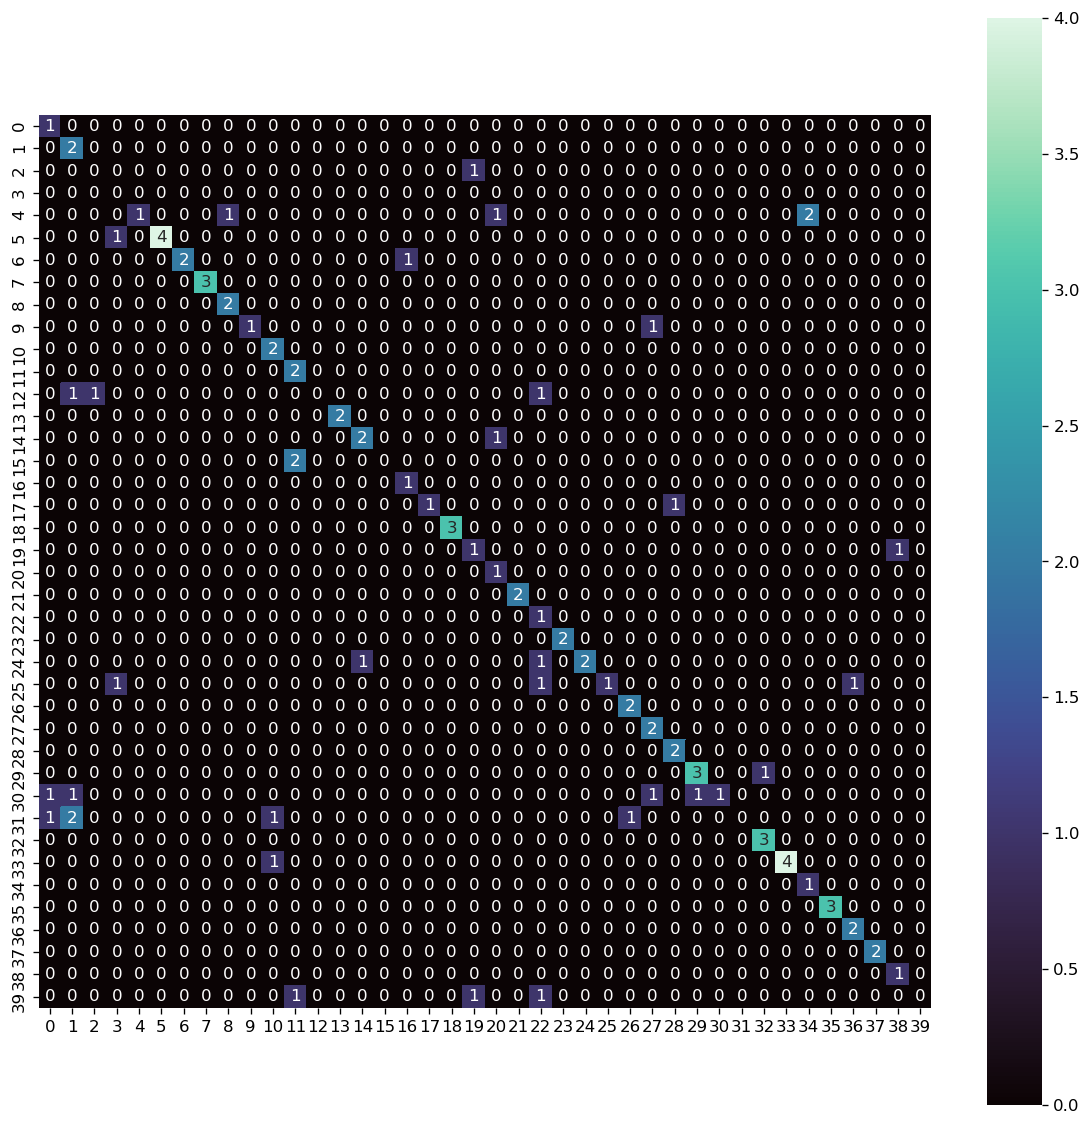

In [100]:
plt.subplots(figsize=(12, 12), dpi=120)
sns.heatmap(confusion_matrix(Y_test, prediction), annot=True, square=True, cmap='mako')
plt.show()

In [116]:
indxs = np.random.randint(1, len(dataset['images']), 2)

In [117]:
indxs

array([144, 384])

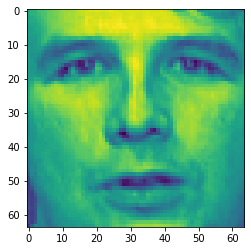

In [133]:
plt.imshow(dataset['images'][indxs[0]])
plt.show()

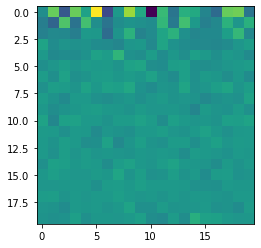

In [135]:
plt.imshow(data_transformed[indxs[0]].reshape(20,20))
plt.show()

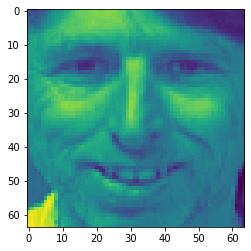

In [136]:
plt.imshow(dataset['images'][indxs[1]])
plt.show()

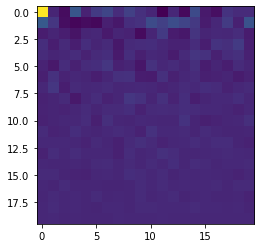

In [137]:
plt.imshow(data_transformed[indxs[1]].reshape(20,20))
plt.show()

### n_components = 100

In [167]:
pca = PCA(n_components = 100)

In [168]:
data_transformed = pca.fit_transform(dataset['data'])

In [169]:
data_transformed.shape

(400, 100)

In [170]:
# Сформируйте случайным образом выборки train и test 
# Не забудьте про seed_random

In [171]:
X_train, X_test, Y_train, Y_test =  train_test_split(data_transformed, dataset['target'], random_state=5)

In [172]:
# Для всех 3-х вариантов  выполните классификацию (метод выберите сами).
# Расчитайте метрики качества, 
# дополнительно - количество правильно распознанных изображений.
# Сравните результаты: number of components, learning time, accuracy_score.

In [173]:
rfc = RandomForestClassifier(n_estimators = 400, max_depth=5)

In [174]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [175]:
prediction = rfc.predict(X_test)

In [176]:
print(classification_report(Y_test, prediction, zero_division=0))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      0.40      0.57         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       0.67      1.00      0.80         2
          11       0.40      1.00      0.57         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         1
          17       0.67    

In [177]:
indxs = np.random.randint(1, len(dataset['images']), 2)

In [178]:
indxs

array([144, 251])

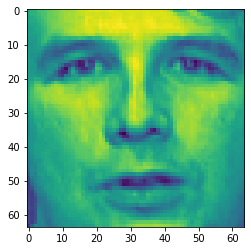

In [179]:
plt.imshow(dataset['images'][indxs[0]])
plt.show()

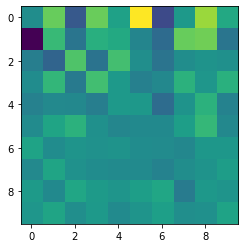

In [180]:
plt.imshow(data_transformed[indxs[0]].reshape(10,10))
plt.show()

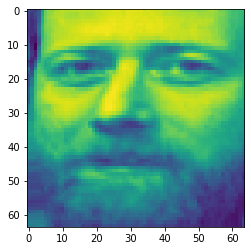

In [181]:
plt.imshow(dataset['images'][indxs[1]])
plt.show()

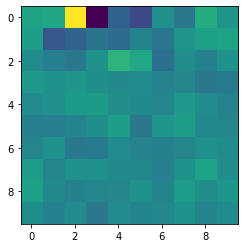

In [182]:
plt.imshow(data_transformed[indxs[1]].reshape(10,10))
plt.show()

## без сжатия

In [143]:
X_train, X_test, Y_train, Y_test =  train_test_split(dataset['data'], dataset['target'], random_state=5)

In [144]:
rfc = RandomForestClassifier(n_estimators = 400, max_depth=5)

In [145]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [146]:
prediction1 = rfc.predict(X_test)

In [147]:
print(classification_report(Y_test, prediction1, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3
           8       0.50      0.50      0.50         2
           9       0.50      0.50      0.50         2
          10       0.40      1.00      0.57         2
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1
          17       1.00    

#### При сжатие точность класиификации составила 0.65, а без сжатия 0.63. Также при сжатии лучше макро-среднее по recall, что говорит о более точной классификации, то есть мы меньше ошибаемся в ошибках первого рода.